In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
glass_type = pd.read_csv('glass.csv')

In [3]:
glass_type.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Standardizing a variable


In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(glass_type.drop('Type',axis=1))

StandardScaler()

In [5]:
features = ss.transform(glass_type.drop('Type',axis=1))
feature_frame = pd.DataFrame(features,columns=glass_type.columns[:-1])
feature_frame

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


# Finding the correction among the Features

<AxesSubplot:>

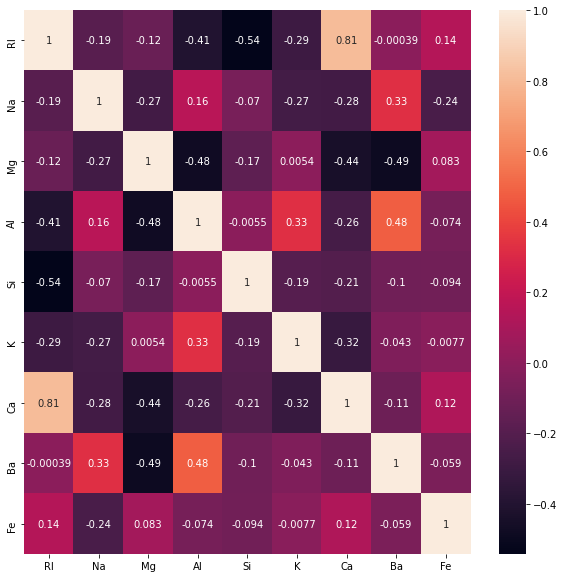

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(feature_frame.iloc[:,0:].corr(),annot=True)

# Train and Test Split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_frame,glass_type['Type'],
                                                    test_size=0.30)

# Implimenting KNN algorithum

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [9]:
pred = knn.predict(X_test)

# Predictions and Evaluation

In [10]:
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import cross_val_score

In [11]:
print(confusion_matrix(y_test,pred))

[[14  3  4  0  0  0]
 [ 5 13  1  5  0  0]
 [ 1  1  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  2  0  1  0  7]]


In [12]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.70      0.67      0.68        21
           2       0.68      0.54      0.60        24
           3       0.29      0.50      0.36         4
           5       0.33      1.00      0.50         3
           6       1.00      1.00      1.00         3
           7       1.00      0.70      0.82        10

    accuracy                           0.65        65
   macro avg       0.67      0.73      0.66        65
weighted avg       0.71      0.65      0.66        65



# Recognising the correct value of K

In [13]:
error_rate = []

for i in range(1,70):
    knn   = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plotting the error rate against the values of K

Text(0, 0.5, 'Error Rate')

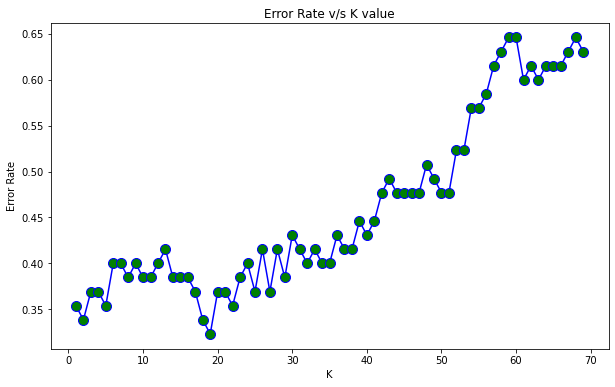

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,70),error_rate,color='blue',linestyle='solid',marker='o',markerfacecolor='green',markersize=10)
plt.title('Error Rate v/s K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Finding the minimum error rate out of different values of K

In [15]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[18  3  0  0  0  0]
 [ 9 11  1  3  0  0]
 [ 3  1  0  0  0  0]
 [ 0  2  0  1  0  0]
 [ 0  0  0  0  2  1]
 [ 2  1  0  0  0  7]]


              precision    recall  f1-score   support

           1       0.56      0.86      0.68        21
           2       0.61      0.46      0.52        24
           3       0.00      0.00      0.00         4
           5       0.25      0.33      0.29         3
           6       1.00      0.67      0.80         3
           7       0.88      0.70      0.78        10

    accuracy                           0.60        65
   macro avg       0.55      0.50      0.51        65
weighted avg       0.60      0.60      0.58        65

